In [2]:
import os
import numpy as np

In [ ]:
basedir = '/gpfs/work/machnitz/plankton_dataset/new_data/4David/M160/Sorted'

In [13]:
def getsubdirs(basedir):
    assert os.path.isdir(basedir)
    return [d for d in os.listdir(basedir) if os.path.isdir(os.path.join(basedir, d))]


In [21]:
classes = getsubdirs(basedir)
classes

['Jellyfish',
 'Zooplankton_Other',
 'Gastropoda',
 'Dinoflagellates',
 'Noctiluca',
 'Phytoplankton',
 'Trichodesmium',
 'Foraminifera',
 'Multiples',
 'Appendicularia',
 'MarineSnow_Jelly',
 'MarineSnow_Comet',
 'Ceratocoris',
 'MarineSnow_FaecalPellet',
 'Trochophora',
 'Radiolaria',
 'Blurry',
 'Bubbles',
 'Copepods',
 'MarineSnow_Detritus']

In [27]:
all_dates = []
for c in classes:
    classdir = os.path.join(basedir, c)
    all_dates += getsubdirs(classdir)
all_dates = list(np.unique(all_dates))
len(all_dates)

20

In [32]:
h, w = [], []
counts_per_day = np.zeros((len(all_dates), len(classes)),dtype=int)
for idx_class, c in enumerate(classes):
    classdir = os.path.join(basedir, c)
    dates = getsubdirs(classdir)
    for day in dates:
        idx_day = all_dates.index(day)
        daydir = os.path.join(classdir, day)
        imgfiles = os.listdir(daydir)
        assert np.all([f.endswith('.png') for f in imgfiles])
        assert counts_per_day[idx_day, idx_class] == 0
        counts_per_day[idx_day, idx_class] = len(imgfiles)

In [63]:
def plot_2dhist(x, row_labels=None, col_labels=None):
    plt.figure(figsize=(15,15))
    axtop = plt.subplot(2,2, 2)
    plt.plot(np.arange(1, x.shape[1] + 1), x.sum(axis=0))
    axtop.set_xticks([])
    axleft = plt.subplot(2,2, 3)
    plt.plot(x.sum(axis=1), np.arange(1, x.shape[0] + 1))
    axleft.set_yticks([])
    axim = plt.subplot(2,2, 4)
    plt.imshow(x)
    
    if row_labels is not None:
        axim.set_yticks(np.arange(1, x.shape[0] + 1))
        axim.set_yticklabels(row_labels)
        
    if col_labels is not None:
        axim.set_yticks(np.arange(1, x.shape[1] + 1))
        axim.set_yticklabels(col_labels)
    

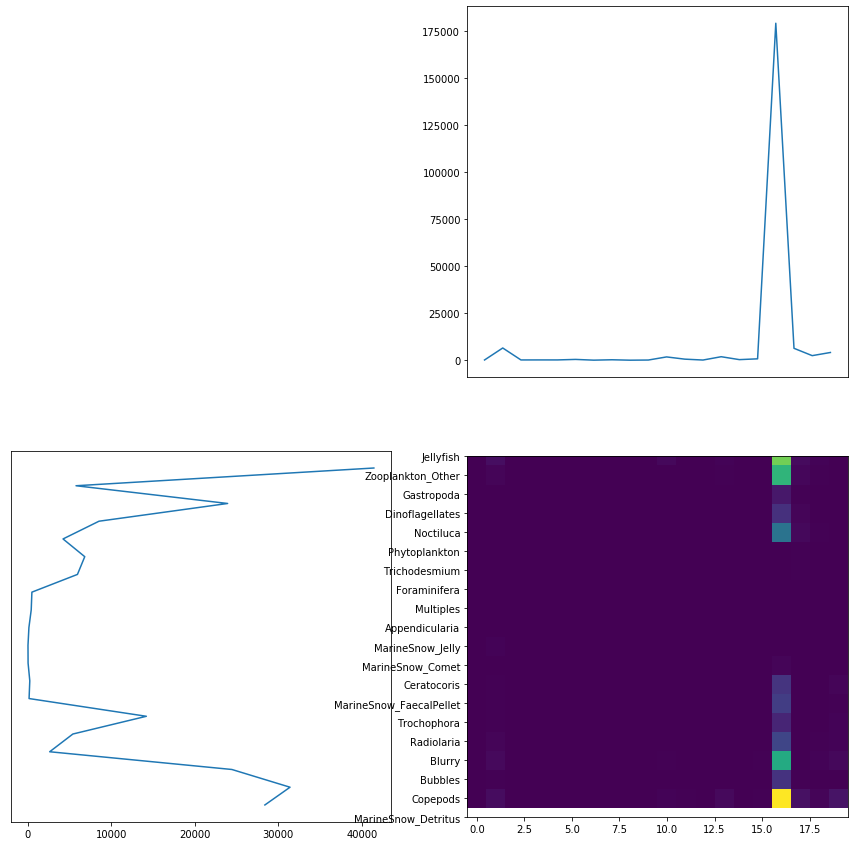

In [64]:
plot_2dhist(counts_per_day, row_labels = all_dates, col_labels=classes)

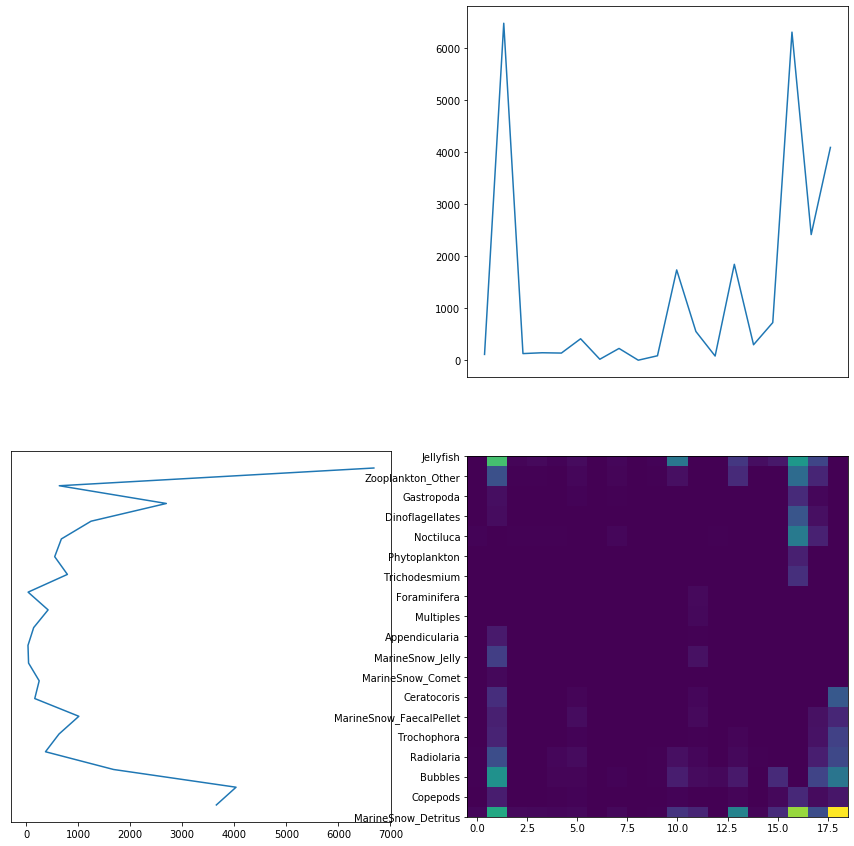

In [69]:
cpd_noblurry = np.concatenate((counts_per_day[:,:16], counts_per_day[:, 17:]), axis=1)
classes_noblurry = classes[:16] + classes[17:]
plot_2dhist(cpd_noblurry, row_labels = all_dates, col_labels=classes_noblurry)

In [70]:
counts_per_day.sum(axis=0)

array([   111,   6480,    127,    143,    137,    412,     18,    226,
            0,     85,   1736,    552,     80,   1844,    297,    723,
       178999,   6309,   2416,   4092])